In [1]:
%%capture

# install the Matatika client library and iplotter fork
!pip install matatika==1.6.0 matatika-iplotter==1.1.1 -U

!pip install pandas

In [2]:
# configure a new client
from matatika.library import MatatikaClient

auth_token = '<AUTH_TOKEN>'
endpoint_url = '<ENDPOINT_URL>'
workspace_id = '<WORKSPACE_ID>'

client = MatatikaClient(auth_token, endpoint_url, workspace_id)

In [3]:
# fetch dataset data as Chart.js specification format
from matatika.types import DataFormat

dataset_alias = 'total-users-last-50-days'
data = client.fetch(dataset_alias, data_format=DataFormat.CHARTJS)

In [4]:
# perform some data processing
import pandas as pd

window_size = 7
threshold_percentage = 75

total_users_data = pd.Series(data['data']['datasets'][0]['data'])
rolling_average = total_users_data.rolling(window_size).mean()
upper = rolling_average * (1 + (threshold_percentage / 100))
lower = rolling_average * (1 - (threshold_percentage / 100))

data['data']['datasets'].append({
    'label': 'Rolling average',
    'fill': False,
    'backgroundColor': 'rgba(121, 209, 121, 0.2)',
    'borderColor': 'rgba(121, 209, 121, 1)',
    'borderWidth': 1,
    'data': rolling_average.where(upper.notnull(), None).to_list()
})

data['data']['datasets'].append({
    'label': 'Upper-threshold',
    'fill': '+1',
    'backgroundColor': 'rgba(255, 173, 20, 0.2)',
    'borderColor': 'rgba(255, 173, 20, 1)',
    'borderWidth': 1,
    'data': upper.where(upper.notnull(), None).to_list()
})

data['data']['datasets'].append({
    'label': 'Lower-threshold',
    'fill': -1,
    'backgroundColor': 'rgba(255, 173, 20, 0.2)',
    'borderColor': 'rgba(255, 173, 20, 1)',
    'borderWidth': 1,
    'data': lower.where(lower.notnull(), None).to_list()
})

# Total Website Users Over the Last 50 Days

Rolling average band plotted to visualise the days on which the total number of users were 75% higher or lower than a 7-day average.

- `Total Users` is the actual data
- `Rolling average` is a centered rolling average with a windows size of 7 elements
- `Upper-threshold` is the calculated rolling average with a 75% increase
- `Lower-threshold` is the calculated rolling average with a 75% decrease

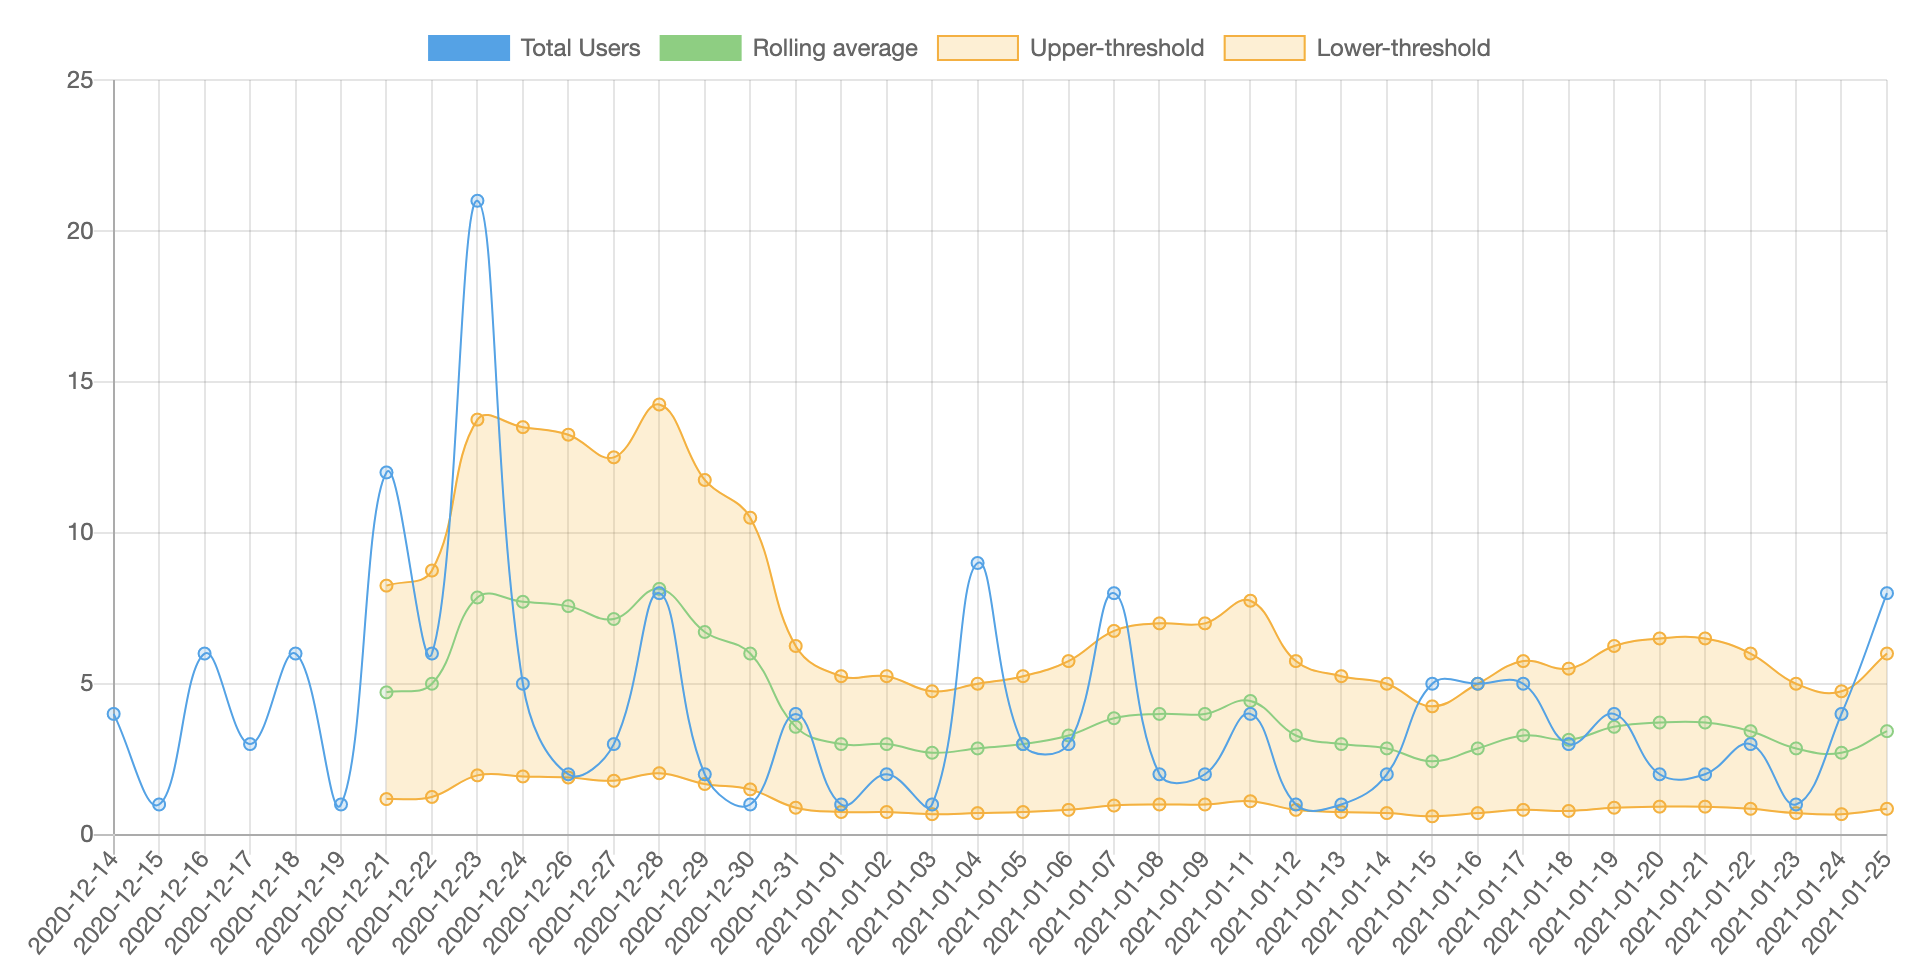

In [5]:
# plot the processed data using Chart.js
from iplotter import ChartJSPlotter

plotter = ChartJSPlotter()
plotter.plot(**data, as_image=True)